# EDA Stanford 
On a typical day in the United States, police officers make more than 50,000 traffic stops. Stanford's team is gathering, analyzing, and releasing records from millions of traffic stops by law enforcement agencies across the country. The goal is to help researchers, journalists, and policymakers investigate and improve interactions between police and the public.

## Data cleaning

In [222]:
import pandas as pd

In [223]:
ri = pd.read_csv('ri_statewide_2020_04_01.csv')
ri.head(10)

C:\Users\RoccoJustice\AppData\Local\Temp\ipykernel_10980\479554742.py:1: DtypeWarning: Columns (6,17,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv('ri_statewide_2020_04_01.csv')


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,11/22/2005,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,10/1/2005,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,10/1/2005,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,10/1/2005,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,10/1/2005,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
5,6,10/1/2005,15:50:00,X3,white,male,200,vehicular,False,True,...,Other Traffic Violation,NaN,NaN,OT,W,M,M,NaN,NaN,NaN
6,7,9/11/2005,11:45:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
7,8,9/11/2005,11:45:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
8,9,10/4/2005,11:55:00,X3,hispanic,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,H,M,M,NaN,NaN,NaN
9,10,10/4/2005,11:55:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN


In [224]:
ri.shape

(509681, 31)

In [225]:
ri.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make', 'vehicle_model',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne', 'raw_SearchResultTwo',
       'raw_SearchResultThree'],
      dtype='object')

In [226]:
ri.isnull().sum()

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [227]:
ri.drop(['raw_BasisForStop',
 'raw_OperatorRace',
 'raw_OperatorSex',
 'raw_ResultOfStop',
 'raw_SearchResultOne',
 'raw_SearchResultTwo',
 'raw_SearchResultThree'], axis = 'columns', inplace = True) # No info on this variables

In [228]:
ri.shape
ri.isnull().sum()

raw_row_number             0
date                      10
time                      10
zone                      10
subject_race           29073
subject_sex            29097
department_id             10
type                       0
arrest_made            29073
citation_issued        29073
warning_issued         29073
outcome                35841
contraband_found      491919
contraband_drugs      493693
contraband_weapons    497886
contraband_alcohol    508464
contraband_other      491919
frisk_performed           10
search_conducted           0
search_basis          491919
reason_for_search     491919
reason_for_stop        29073
vehicle_make          191564
vehicle_model         279593
dtype: int64

In [229]:
# This variables are critical for EDA
ri.dropna(subset = ['subject_race', 'subject_sex', 'reason_for_stop', 'outcome'], inplace = True)

In [230]:
ri.isnull().sum()

raw_row_number             0
date                       0
time                       0
zone                       0
subject_race               0
subject_sex                0
department_id              0
type                       0
arrest_made                0
citation_issued            0
warning_issued             0
outcome                    0
contraband_found      456490
contraband_drugs      458226
contraband_weapons    462316
contraband_alcohol    472621
contraband_other      456490
frisk_performed            0
search_conducted           0
search_basis          456490
reason_for_search     456490
reason_for_stop            0
vehicle_make          161088
vehicle_model         247447
dtype: int64

In [231]:
ri.shape

(473821, 24)

In [232]:
ri['arrest_made'] = ri.arrest_made.astype('bool')
ri['citation_issued'] = ri.citation_issued.astype('bool')
ri['warning_issued'] = ri.warning_issued.astype('bool')

In [233]:
ri.dtypes

raw_row_number         int64
date                  object
time                  object
zone                  object
subject_race          object
subject_sex           object
department_id         object
type                  object
arrest_made             bool
citation_issued         bool
warning_issued          bool
outcome               object
contraband_found      object
contraband_drugs      object
contraband_weapons    object
contraband_alcohol    object
contraband_other      object
frisk_performed       object
search_conducted        bool
search_basis          object
reason_for_search     object
reason_for_stop       object
vehicle_make          object
vehicle_model         object
dtype: object

In [234]:
combined = ri.date.str.cat(ri.time, sep = ' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace = True)

In [235]:
ri.index

DatetimeIndex(['2005-11-22 11:15:00', '2005-10-01 12:20:00',
               '2005-10-01 12:30:00', '2005-10-01 12:50:00',
               '2005-10-01 13:10:00', '2005-10-01 15:50:00',
               '2005-09-11 11:45:00', '2005-09-11 11:45:00',
               '2005-10-04 11:55:00', '2005-10-04 11:55:00',
               ...
               '2015-12-28 00:10:00', '2015-12-29 13:28:00',
               '2015-12-27 12:45:00', '2015-12-27 13:43:00',
               '2015-12-28 02:29:00', '2015-12-30 11:42:00',
               '2015-08-04 10:40:00', '2015-12-20 11:17:00',
               '2015-11-09 23:35:00', '2015-10-30 11:09:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=473821, freq=None)

In [236]:
ri.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make',
       'vehicle_model'],
      dtype='object')

## Exploration

In [237]:
ri.reason_for_stop.value_counts(normalize = True)

Speeding                            0.566043
Other Traffic Violation             0.189101
Equipment/Inspection Violation      0.122935
Registration Violation              0.041362
Seatbelt Violation                  0.034340
Special Detail/Directed Patrol      0.028399
Call for Service                    0.013271
Violation of City/Town Ordinance    0.002153
APB                                 0.000939
Motorist Assist/Courtesy            0.000770
Suspicious Person                   0.000466
Warrant                             0.000222
Name: reason_for_stop, dtype: float64

In [238]:
female = ri[ri.subject_sex == 'female']
male = ri[ri.subject_sex == 'male']
female.reason_for_stop.value_counts(normalize = True), male.reason_for_stop.value_counts(normalize = True)

(Speeding                            0.666050
 Other Traffic Violation             0.137567
 Equipment/Inspection Violation      0.102869
 Registration Violation              0.043379
 Seatbelt Violation                  0.027424
 Call for Service                    0.014014
 Special Detail/Directed Patrol      0.005115
 Violation of City/Town Ordinance    0.001633
 APB                                 0.000782
 Motorist Assist/Courtesy            0.000650
 Suspicious Person                   0.000340
 Warrant                             0.000178
 Name: reason_for_stop, dtype: float64,
 Speeding                            0.528537
 Other Traffic Violation             0.208428
 Equipment/Inspection Violation      0.130460
 Registration Violation              0.040605
 Special Detail/Directed Patrol      0.037131
 Seatbelt Violation                  0.036934
 Call for Service                    0.012992
 Violation of City/Town Ordinance    0.002348
 APB                                 0.0

In [239]:
f_and_spd = ri[(ri.subject_sex == 'female') & (ri.reason_for_stop == 'Speeding')]
m_and_spd = ri[(ri.subject_sex == 'male') & (ri.reason_for_stop == 'Speeding')]
f_and_spd.outcome.value_counts(normalize = True), m_and_spd.outcome.value_counts(normalize = True)

(citation    0.954609
 warning     0.039059
 arrest      0.006332
 Name: outcome, dtype: float64,
 citation    0.946763
 warning     0.036167
 arrest      0.017070
 Name: outcome, dtype: float64)

In [240]:
ri.search_conducted.mean()

0.03657710401185258

In [241]:
ri.groupby('subject_sex').search_conducted.mean()

subject_sex
female    0.018556
male      0.043336
Name: search_conducted, dtype: float64

In [242]:
ri.groupby(['reason_for_stop', 'subject_sex']).search_conducted.mean()

reason_for_stop                   subject_sex
APB                               female         0.168317
                                  male           0.270349
Call for Service                  female         0.054114
                                  male           0.106768
Equipment/Inspection Violation    female         0.040394
                                  male           0.071471
Motorist Assist/Courtesy          female         0.119048
                                  male           0.202847
Other Traffic Violation           female         0.037462
                                  male           0.058130
Registration Violation            female         0.053871
                                  male           0.101987
Seatbelt Violation                female         0.017777
                                  male           0.031429
Special Detail/Directed Patrol    female         0.018154
                                  male           0.010238
Speeding                  

In [243]:
ri.search_conducted.value_counts()

False    456490
True      17331
Name: search_conducted, dtype: int64

In [244]:
ri.reason_for_search.value_counts(dropna = False).head(15), ri.shape

(NaN                                         456490
 Incident to Arrest                            6810
 Probable Cause                                2042
 Odor of Drugs/Alcohol                         1824
 Reasonable Suspicion                          1105
 Inventory/Tow                                 1083
 Terry Frisk                                    853
 Incident to Arrest|Inventory/Tow               559
 Plain View                                     405
 Odor of Drugs/Alcohol|Probable Cause           151
 Probable Cause|Odor of Drugs/Alcohol           144
 Incident to Arrest|Odor of Drugs/Alcohol       122
 Incident to Arrest|Terry Frisk                  99
 Incident to Arrest|Probable Cause               99
 Odor of Drugs/Alcohol|Incident to Arrest        93
 Name: reason_for_search, dtype: int64,
 (473821, 24))

In [245]:
1- (ri.reason_for_search.isnull().sum())/(ri.shape[0])

0.036577104011852546

In [246]:
ri['frisk'] = ri.reason_for_search.str.contains('Terry Frisk', na=False)
ri.frisk.dtype, ri.frisk.sum()

(dtype('bool'), 1560)

In [247]:
searched = ri[ri.search_conducted == True]
searched.frisk.mean()

0.09001211701575212

In [248]:
searched.groupby('subject_sex').frisk.mean()

subject_sex
female    0.065888
male      0.093886
Name: frisk, dtype: float64

In [249]:
ri.arrest_made.mean()

0.03504065881419355

In [250]:
arr_hour = ri.groupby(ri.index.hour).arrest_made.mean()
arr_hour

stop_datetime
0     0.053293
1     0.068647
2     0.062293
3     0.053638
4     0.055306
5     0.033394
6     0.013098
7     0.014010
8     0.019945
9     0.024934
10    0.025823
11    0.027322
12    0.031718
13    0.030573
14    0.031927
15    0.032575
16    0.034051
17    0.039632
18    0.040474
19    0.031799
20    0.039865
21    0.061108
22    0.044777
23    0.046019
Name: arrest_made, dtype: float64

In [251]:
arr_month = ri.groupby(ri.index.month).arrest_made.mean()
arr_month

stop_datetime
1     0.037158
2     0.038000
3     0.033345
4     0.033122
5     0.033166
6     0.032888
7     0.036470
8     0.033470
9     0.031553
10    0.035276
11    0.034720
12    0.041843
Name: arrest_made, dtype: float64

In [252]:
import matplotlib.pyplot as plt

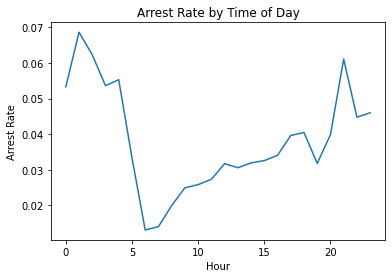

In [253]:
plt.plot(arr_hour)
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day');

In [254]:
searched = ri[ri.search_conducted == True]
drugs = searched.groupby(searched.index.year).contraband_drugs.mean()
search_cond = ri.groupby(ri.index.year).search_conducted.mean()
drugs, search_cond

(stop_datetime
 2005    0.176375
 2006    0.193600
 2007    0.223555
 2008    0.218194
 2009    0.239905
 2010    0.271528
 2011    0.328691
 2012    0.345923
 2013    0.448182
 2014    0.468935
 2015    0.431373
 Name: contraband_drugs, dtype: float64,
 stop_datetime
 2005    0.050839
 2006    0.037844
 2007    0.041296
 2008    0.038453
 2009    0.048784
 2010    0.041556
 2011    0.037283
 2012    0.031998
 2013    0.028916
 2014    0.030060
 2015    0.027673
 Name: search_conducted, dtype: float64)

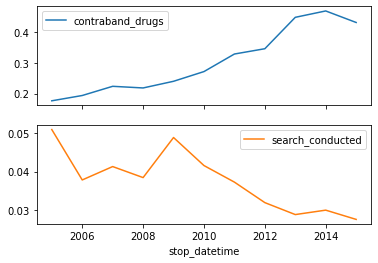

In [255]:
annual = pd.concat([drugs, search_cond], axis = 1)
annual.plot(subplots = True);

<AxesSubplot:ylabel='subject_race'>

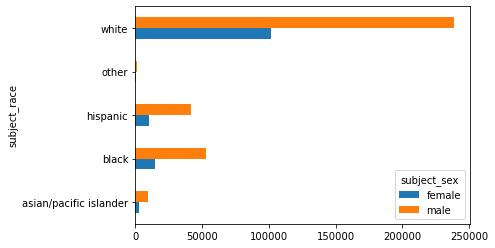

In [256]:
table = pd.crosstab(ri.subject_race, ri.subject_sex)
table.plot(kind = 'barh')

# Data cleaning of new dataset

Dataset from: 
https://www.ncei.noaa.gov/

In [257]:
weather = pd.read_csv('USW00014765.csv')
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,...,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV01,WV01_ATTRIBUTES,WV03,WV03_ATTRIBUTES,WV20,WV20_ATTRIBUTES
0,USW00014765,"PROVIDENCE, RI US",41.72252,-71.43248,15.4,12/31/2015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,"PROVIDENCE, RI US",41.72252,-71.43248,15.4,12/30/2015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014765,"PROVIDENCE, RI US",41.72252,-71.43248,15.4,12/29/2015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014765,"PROVIDENCE, RI US",41.72252,-71.43248,15.4,12/28/2015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014765,"PROVIDENCE, RI US",41.72252,-71.43248,15.4,12/27/2015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
weather[['AWND', 'WSF2']].sample(5), weather[['AWND', 'WSF2']].describe()

(      AWND  WSF2
 1371  7.61  17.9
 3669  8.50  17.9
 839   6.04  15.0
 94    3.80  16.1
 3422  5.82  15.0,
               AWND         WSF2
 count  4017.000000  4017.000000
 mean      8.593707    19.274782
 std       3.364601     5.623866
 min       0.220000     4.900000
 25%       6.260000    15.000000
 50%       8.050000    17.900000
 75%      10.290000    21.900000
 max      26.840000    48.100000)

In [259]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 100 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          4017 non-null   object 
 1   NAME             4017 non-null   object 
 2   LATITUDE         4017 non-null   float64
 3   LONGITUDE        4017 non-null   float64
 4   ELEVATION        4017 non-null   float64
 5   DATE             4017 non-null   object 
 6   ACMH             0 non-null      float64
 7   ACMH_ATTRIBUTES  0 non-null      float64
 8   ACSH             0 non-null      float64
 9   ACSH_ATTRIBUTES  0 non-null      float64
 10  AWND             4017 non-null   float64
 11  AWND_ATTRIBUTES  4017 non-null   object 
 12  FMTM             2526 non-null   float64
 13  FMTM_ATTRIBUTES  2526 non-null   object 
 14  FRGT             0 non-null      float64
 15  FRGT_ATTRIBUTES  0 non-null      float64
 16  PGTM             2306 non-null   float64
 17  PGTM_ATTRIBUT

In [260]:
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather_up = weather[(weather['DATE'].dt.year >= 2005) & (weather['DATE'].dt.year < 2016)]


In [261]:
weather_up.set_index('DATE', inplace = True)

## Wind conditions

In [262]:
weather_up[['AWND', 'WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


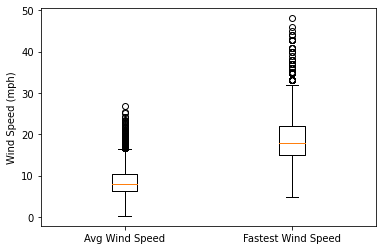

In [263]:
fig, ax = plt.subplots()
ax.boxplot([weather_up['AWND'], weather_up['WSF2']])
ax.set_xticklabels(['Avg Wind Speed', 'Fastest Wind Speed'])
ax.set_ylabel('Wind Speed (mph)');


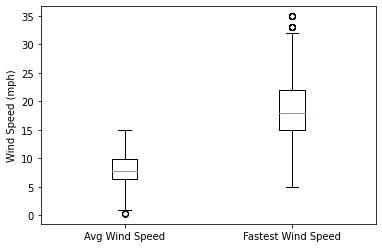

In [264]:
wind = weather_up[(weather_up['AWND'] <= 15) & (weather_up['WSF2'] <= 35)]
fig, ax = plt.subplots()
ax.boxplot([wind['AWND'], wind['WSF2']])
ax.set_xticklabels(['Avg Wind Speed', 'Fastest Wind Speed'])
ax.set_ylabel('Wind Speed (mph)');

In [265]:
wind[['AWND', 'WSF2']].describe()

,AWND,WSF2
count,3808.000000,3808.000000
mean,8.123067,18.576917
std,2.688577,4.740828
min,0.220000,4.900000
25%,6.260000,15.000000
50%,7.830000,17.900000
75%,9.840000,21.900000
max,14.990000,34.900000


## Temperature conditions

In [266]:
weather_up[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,4017.000000,4017.000000
mean,43.484441,50.640030,61.268608
std,17.020298,14.611124,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,40.000000,47.000000
50%,44.000000,51.000000,62.000000
75%,58.000000,63.000000,77.000000
max,77.000000,86.000000,102.000000


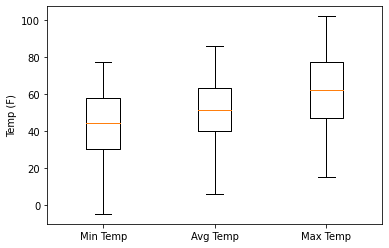

In [267]:
fig, ax = plt.subplots()
ax.boxplot([weather_up['TMIN'], weather_up['TAVG'], weather_up['TMAX']])
ax.set_xticklabels(['Min Temp', 'Avg Temp', 'Max Temp'])
ax.set_ylabel('Temp (F)');

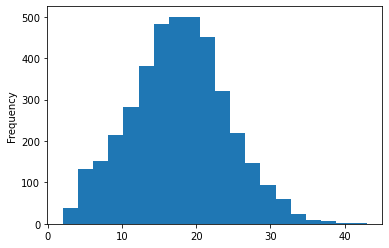

In [268]:
weather_up['TDIFF'] = weather_up['TMAX'] - weather_up['TMIN']
weather_up.TDIFF.plot(kind = 'hist', bins = 20);

In [269]:
temp = weather_up[['TMIN', 'TAVG', 'TMAX']]
temp.head()

,TMIN,TAVG,TMAX
DATE,,,
2015-12-31,35,39,50
2015-12-30,27,30,35
2015-12-29,28,33,40
2015-12-28,30,40,44
2015-12-27,44,51,61


In [270]:
temp.sum(), temp.sum(axis = 'columns').head()

(TMIN    174677
 TAVG    203421
 TMAX    246116
 dtype: int64,
 DATE
 2015-12-31    124
 2015-12-30     92
 2015-12-29    101
 2015-12-28    114
 2015-12-27    156
 dtype: int64)

## Other weather conditions

C:\Users\RoccoJustice\AppData\Local\Temp\ipykernel_10980\3781292730.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather_up['bad_conditions'] = otherw.sum(axis = 'columns')


<AxesSubplot:ylabel='Frequency'>

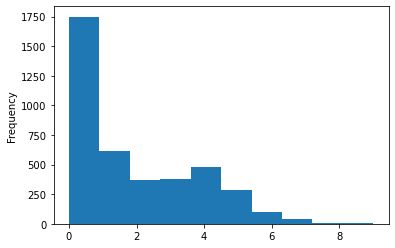

In [271]:
otherw = weather_up.loc[:, 'WT01': 'WT22']
weather_up['bad_conditions'] = otherw.sum(axis = 'columns')
weather_up['bad_conditions'] = weather_up.bad_conditions.fillna(0).astype('int')
weather_up.bad_conditions.plot(kind = 'hist')

In [272]:
weather_up.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [273]:
mapping = {0:'good', 1:'bad', 2:'bad',  3:'bad', 4:'bad', 5: 'worse', 6: 'worse', 7: 'worse', 8: 'worse', 9: 'worse'}
weather_up['rating'] = weather_up.bad_conditions.map(mapping)
weather_up['rating'].value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

In [274]:
cats = ['good', 'bad', 'worse']
weather_up['rating'] = pd.Categorical(weather_up['rating'], categories = cats, ordered = True)
weather_up['rating'].head()


DATE
2015-12-31     bad
2015-12-30     bad
2015-12-29     bad
2015-12-28    good
2015-12-27     bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

# Merging both datasets

In [275]:
ri.reset_index(inplace = True)
weather_up.reset_index(inplace = True)

In [281]:
weather_rating = weather_up[['DATE', 'rating']]
weather_rating.head(), weather_rating.dtypes

(        DATE rating
 0 2015-12-31    bad
 1 2015-12-30    bad
 2 2015-12-29    bad
 3 2015-12-28   good
 4 2015-12-27    bad,
 DATE      datetime64[ns]
 rating          category
 dtype: object)

In [286]:
ri.stop_datetime.head(), ri.date.dtype

(0   2005-11-22 11:15:00
 1   2005-10-01 12:20:00
 2   2005-10-01 12:30:00
 3   2005-10-01 12:50:00
 4   2005-10-01 13:10:00
 Name: stop_datetime, dtype: datetime64[ns],
 dtype('O'))

In [285]:
ri.columns

Index(['stop_datetime', 'raw_row_number', 'date', 'time', 'zone',
       'subject_race', 'subject_sex', 'department_id', 'type', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'contraband_drugs', 'contraband_weapons', 'contraband_alcohol',
       'contraband_other', 'frisk_performed', 'search_conducted',
       'search_basis', 'reason_for_search', 'reason_for_stop', 'vehicle_make',
       'vehicle_model', 'frisk'],
      dtype='object')

In [287]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_datetime', right_on='DATE', how='left')
ri_weather.set_index('stop_datetime', inplace=True)

In [290]:
ri_weather.arrest_made.mean()

0.03504065881419355

In [291]:
ri_weather.groupby('rating').arrest_made.mean()

rating
good     0.066298
bad      0.074550
worse    0.072165
Name: arrest_made, dtype: float64

In [294]:
arrest_rate = ri_weather.groupby(['reason_for_stop', 'rating']).arrest_made.mean()

reason_for_stop                   rating
APB                               good      0.000000
                                  bad       1.000000
                                  worse          NaN
Call for Service                  good      0.000000
                                  bad       0.000000
                                  worse     1.000000
Equipment/Inspection Violation    good      0.132353
                                  bad       0.156863
                                  worse     0.062500
Motorist Assist/Courtesy          good           NaN
                                  bad            NaN
                                  worse          NaN
Other Traffic Violation           good      0.105263
                                  bad       0.183333
                                  worse     0.272727
Registration Violation            good      0.076923
                                  bad       0.111111
                                  worse     0.000000
Seatb

# Insights

1. Speeding is the most common cause for stopping people
2. Seems like women are more likely to get stopped by speeding than men
3. However, both genders get almost the same proportion of tickets, warnings or arrests when stopped
4. Male drivers are searched more than twice as often as female drivers no matter the reason for stop
5. Officers made a search only 3.65% of the times whenever they stopped a vehicle/pedestrian
6. Looks like officers stop more people during the night
7. There has been a constant increase in drug contraband despite the fact that proportion of searches has been decreasing over the time
8. Looks like weather doesn't cause more arrests made


